In [1]:
%load_ext autoreload

In [2]:
%autoreload 1
import datetime as dt
from graph_tool.all import *
%aimport db_api_parser
#import db_api_parser
%aimport timetable
#import timetable

In [3]:
#parser = db_api_parser.db_api_parser("635730573e4f824efa4cd50b81cb0e33")
parser = db_api_parser.db_api_parser("b118565fdce9aeb638ff5d8508cac804")

In [4]:
parser.header = parser.get_header()

In [7]:
eva_numbers = parser.get_eva_numbers('1-2')

In [8]:
len(eva_numbers)

139

In [3]:
date = dt.date(2019, 6, 10)
begin = dt.datetime.combine(date, dt.time(0, 0, 0))
end = dt.datetime.combine(date, dt.time(23, 59, 59))

In [10]:
trips = parser.get_trips(begin, end, eva_numbers)

Gathering trips from 8000260 at 2019-06-10 19:36:00. Completed 138 of 139 stops. Gathered 933 trips.

Departure board API:
Requests: 591
Timeout: 1
Failed: 29


Journey details API:
Requests: 6538
Timeout: 26
Failed: 3058


933 trips gathered


In [11]:
parser.save_trips_to_file(trips, 'test_trips.json')

In [4]:
t = timetable.timetable(begin, end)
t.load_trips_from_file('test_trips.json')

In [5]:
g = t.generate_graph(1000, 10, 120)

Generating locations from trips
Adding locations for ICE 841                                                   
Generating nodes and vertices from trips
Adding nodes and vertices for IC 2381       
Generating transfer links (transfer time 10 to 120 minutes)


In [6]:
t.print_summary()

Locations: 478
Vertices: 9628
Edges: 24034
On-tranport edges: 9602
Stationary on-tranport edges: 4562
Transfer edges: 14432


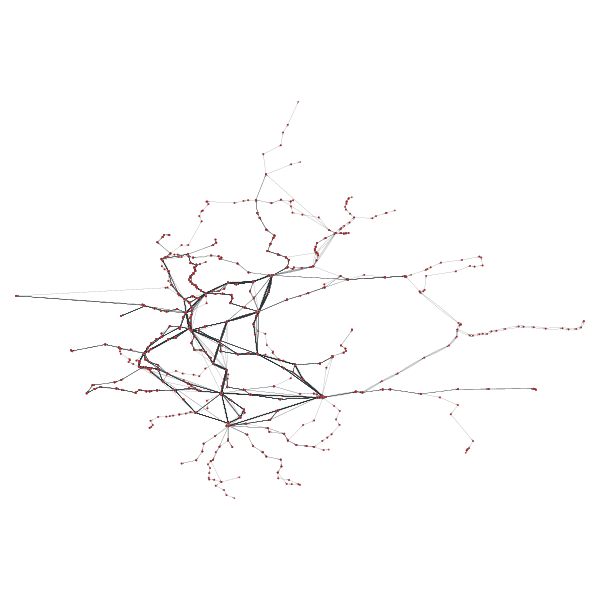

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x7f40d45f6b00, at 0x7f4092ad09e8>

In [7]:
graph_draw(g, pos=g.vp.pos)

In [23]:
o_name, o_id = t.search_location('Frankfurt Main hbf')
d_name, d_id = t.search_location('Berlin Hbf')
print(o_name + ' to ' + d_name)

Frankfurt(Main)Hbf to Berlin Hbf


In [24]:
paths = t.find_route(o_id, d_id, begin)

In [25]:
path = next(paths)

In [27]:
for v in path:
    print('{} ({})'.format(t.g.vp.loc_name[v], t.begin + dt.timedelta(minutes=t.g.vp.time[v])))

 (2019-06-10 00:00:00)
Frankfurt(Main)Hbf (2019-06-10 02:25:00)
Frankfurt(M) Flughafen Fernbf (2019-06-10 02:38:00)
Frankfurt(M) Flughafen Fernbf (2019-06-10 02:44:00)
Mannheim Hbf (2019-06-10 03:26:00)
Mannheim Hbf (2019-06-10 03:28:00)
Stuttgart Hbf (2019-06-10 04:45:00)
Stuttgart Hbf (2019-06-10 05:51:00)
Mannheim Hbf (2019-06-10 06:28:00)
Mannheim Hbf (2019-06-10 07:32:00)
Frankfurt(Main)Hbf (2019-06-10 08:08:00)
Frankfurt(Main)Hbf (2019-06-10 08:20:00)
Mannheim Hbf (2019-06-10 08:56:00)
Mannheim Hbf (2019-06-10 09:06:00)
Stuttgart Hbf (2019-06-10 09:53:00)
Stuttgart Hbf (2019-06-10 09:58:00)
Ulm Hbf (2019-06-10 10:54:00)
Ulm Hbf (2019-06-10 10:56:00)
Günzburg (2019-06-10 11:08:00)
Günzburg (2019-06-10 11:10:00)
Augsburg Hbf (2019-06-10 11:40:00)
Augsburg Hbf (2019-06-10 11:42:00)
München-Pasing (2019-06-10 12:05:00)
München-Pasing (2019-06-10 12:08:00)
München Hbf (2019-06-10 12:14:00)
München Hbf (2019-06-10 13:28:00)
München-Pasing (2019-06-10 13:35:00)
München-Pasing (2019-06-1